In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.shape

(144, 2)

In [ ]:
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index=df['Month']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [ ]:
df.drop("Month",axis=1,inplace=True)

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

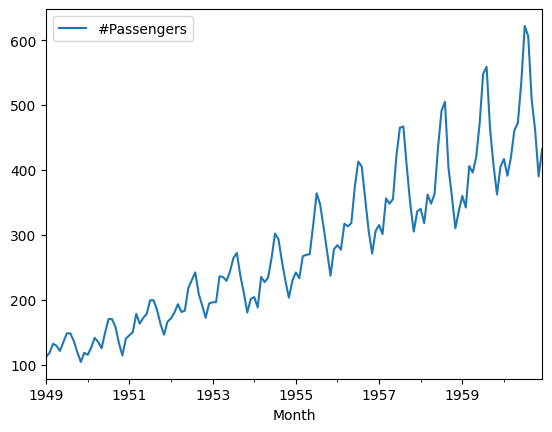

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result=adfuller(df['#Passengers'])

In [ ]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
p_val=result[1]
p_val

0.991880243437641

In [ ]:
if(p_val<0.05):
  print('accept the null hypothesis:','data is stationary')
else:
  print('accept the alternate hypothesis:','data is not stationary')

accept the alternate hypothesis: data is not stationary


In [ ]:
rolling_mean=df.rolling(window=12).mean()

In [ ]:
rolling_mean.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
df_detrended=df-rolling_mean
df_detrended

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


<Axes: title={'center': 'Detrended data'}, xlabel='Month'>

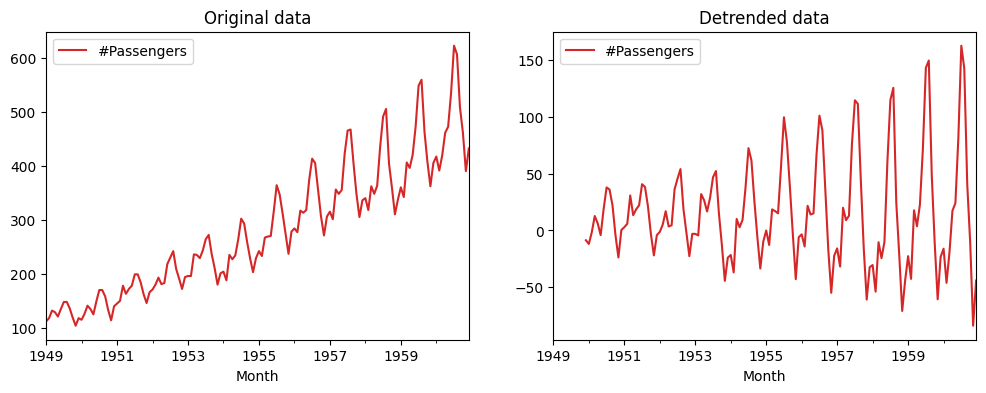

In [ ]:
ax1=plt.subplot(1,2,1)
df.plot(figsize=(12,4),color='tab:red',title='Original data',ax=ax1)

ax2=plt.subplot(1,2,2)
df_detrended.plot(figsize=(12,4),color='tab:red',title='Detrended data',ax=ax2)


In [ ]:
df_detrended.dropna(inplace=True)

In [ ]:
result=adfuller(df_detrended['#Passengers'])

In [ ]:
p_val=result[1]
print(p_val)
if(p_val<0.05):
  print('accept the null hypothesis:','data is stationary')
else:
  print('accept the alternate hypothesis:','data is not stationary')

0.022104139473878875
accept the null hypothesis: data is stationary


In [ ]:
m=df_detrended.rolling(window=12).mean()
s=df_detrended.rolling(window=12).std()


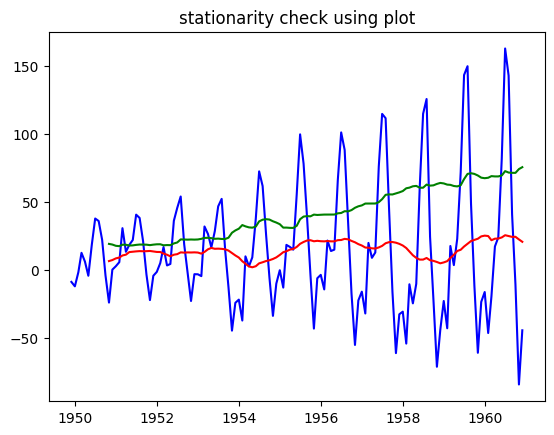

In [ ]:
plt.plot(df_detrended,color='blue',label='Original')
plt.plot(m,color='red',label='mean')
plt.plot(s,color='green',label='std')
plt.title('stationarity check using plot')
plt.show()

In [ ]:
train=df_detrended[:120]['#Passengers']   #10 years
test=df_detrended[120:]['#Passengers']    # 1 year

In [ ]:
train

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1959-07-01,143.083333
1959-08-01,149.583333
1959-09-01,48.666667


In [ ]:
test

,#Passengers
Month,
1959-12-01,-23.333333
1960-01-01,-16.083333
1960-02-01,-46.166667
1960-03-01,-19.250000
1960-04-01,17.333333
1960-05-01,24.000000
1960-06-01,81.750000
1960-07-01,162.583333
1960-08-01,142.666667


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit=model.fit()

In [ ]:
df_detrended['predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
df_detrended

,#Passengers,predicted
Month,,
1949-12-01,-8.666667,NaN
1950-01-01,-11.916667,NaN
1950-02-01,-1.583333,NaN
1950-03-01,12.666667,NaN
1950-04-01,6.166667,NaN
...,...,...
1960-08-01,142.666667,13.223011
1960-09-01,40.916667,13.280637
1960-10-01,-10.583333,13.306771


<Axes: xlabel='Month'>

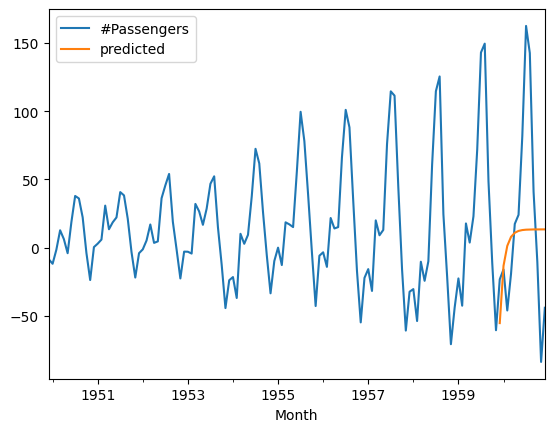

In [ ]:
df_detrended[['#Passengers','predicted']].plot()

In [ ]:
# !pip install numpy==1.23.5 scipy==1.10.1


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima